
#### Black Friday Exploratory Data Anaysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [65]:
dataset = pd.read_csv('blackFriday_train.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
dataset.shape

(550068, 12)

In [9]:
[(feature, 'has', len(dataset[feature].unique()), dataset[feature].dtypes) for feature in dataset.columns]

[('User_ID', 'has', 5891, dtype('int64')),
 ('Product_ID', 'has', 3631, dtype('O')),
 ('Gender', 'has', 2, dtype('O')),
 ('Age', 'has', 7, dtype('O')),
 ('Occupation', 'has', 21, dtype('int64')),
 ('City_Category', 'has', 3, dtype('O')),
 ('Stay_In_Current_City_Years', 'has', 5, dtype('O')),
 ('Marital_Status', 'has', 2, dtype('int64')),
 ('Product_Category_1', 'has', 20, dtype('int64')),
 ('Product_Category_2', 'has', 18, dtype('float64')),
 ('Product_Category_3', 'has', 16, dtype('float64')),
 ('Purchase', 'has', 18105, dtype('int64'))]

In [10]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtypes =='O' ]

In [11]:
categorical_feature.pop(0)

'Product_ID'

In [12]:
categorical_feature = categorical_feature +  ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3' ]

In [13]:
categorical_feature

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [14]:
numeric_feature = [feature for feature in dataset.columns if feature not in categorical_feature]

In [15]:
numeric_feature

['User_ID', 'Product_ID', 'Purchase']

<AxesSubplot:ylabel='Frequency'>

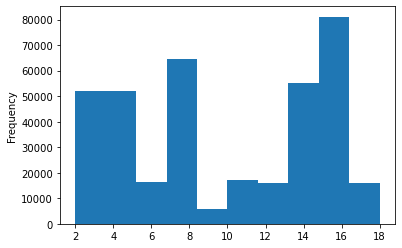

In [16]:
dataset['Product_Category_2'].plot(kind = 'hist')

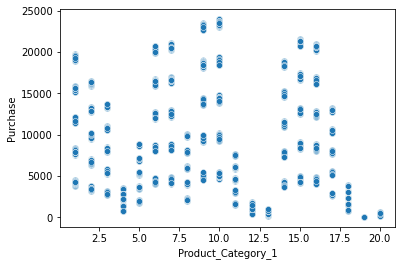

In [17]:
sns.scatterplot(x = dataset['Product_Category_1'], y = dataset['Purchase'])
plt.show()

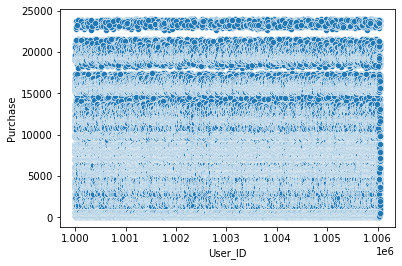

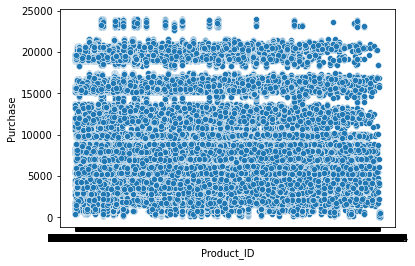

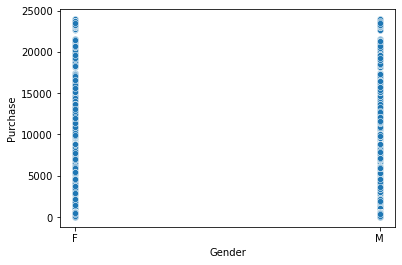

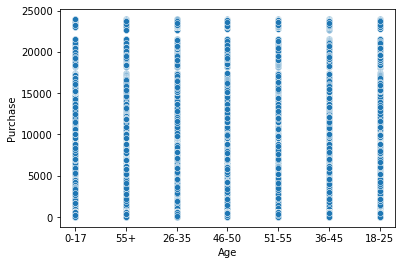

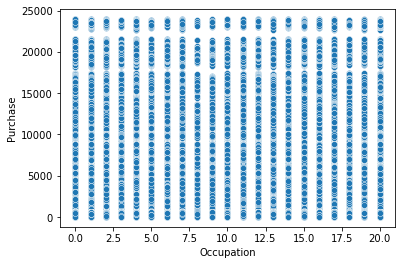

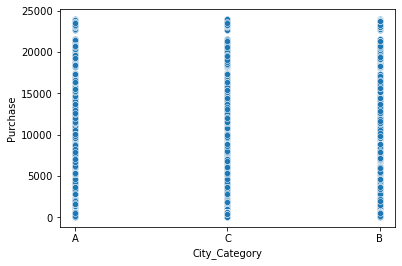

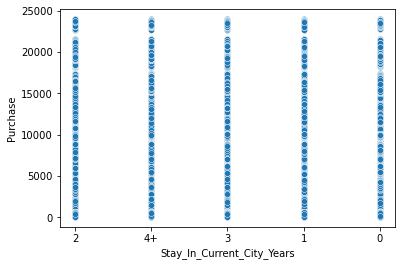

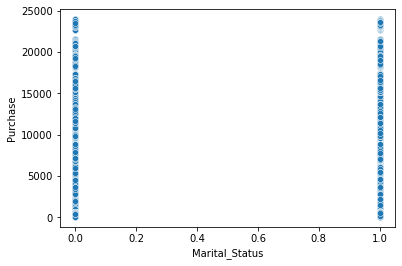

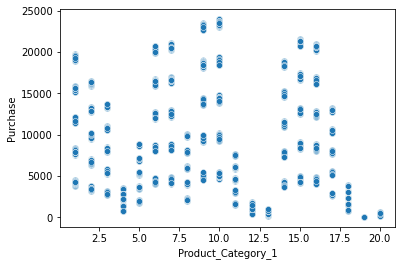

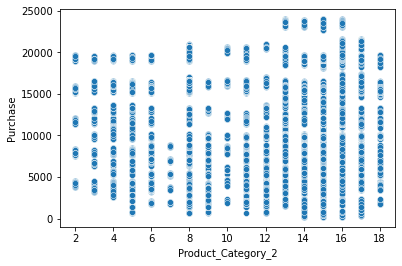

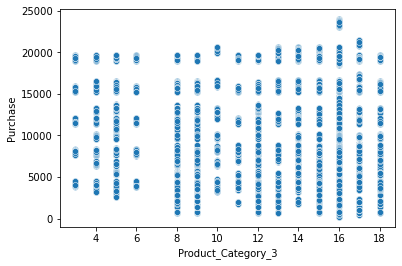

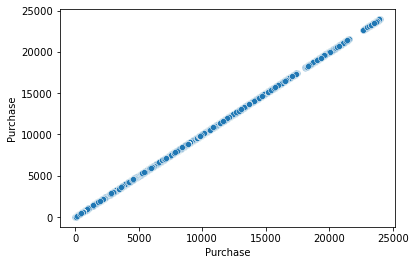

In [18]:
for feature in dataset.columns:
    sns.scatterplot(x = dataset[feature], y = dataset['Purchase'])
    plt.show()

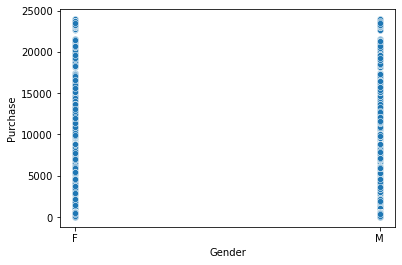

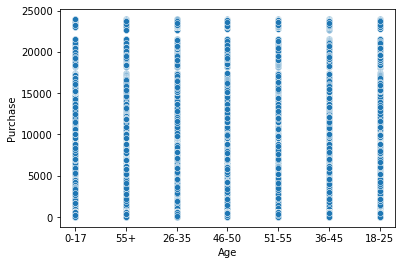

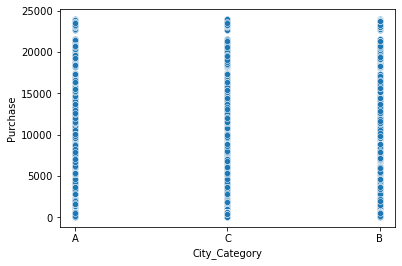

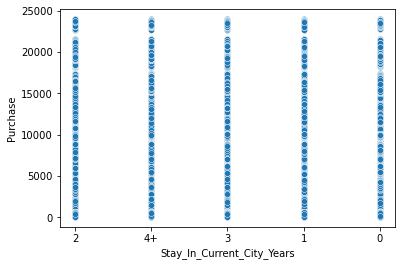

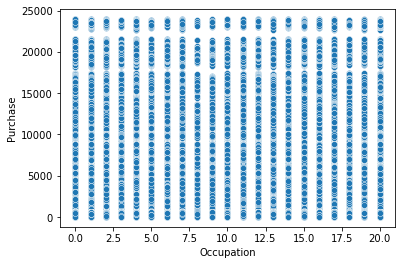

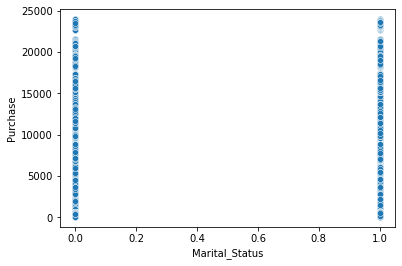

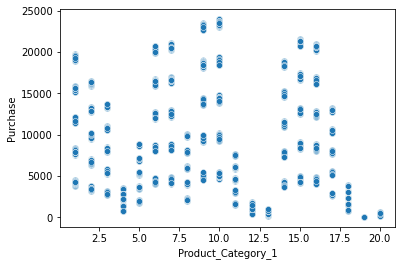

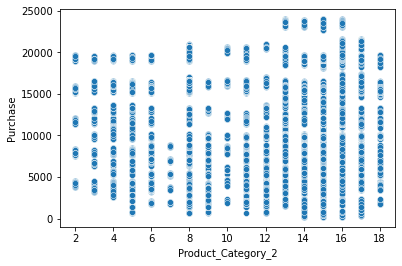

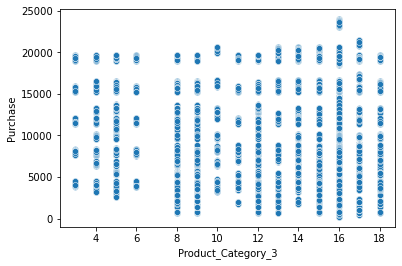

In [57]:
for feature in categorical_feature:
    sns.scatterplot(x = dataset[feature], y = dataset['Purchase'])
    plt.show()

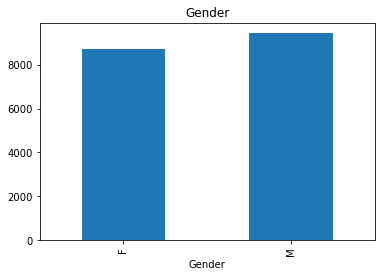

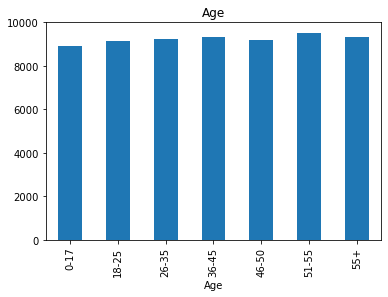

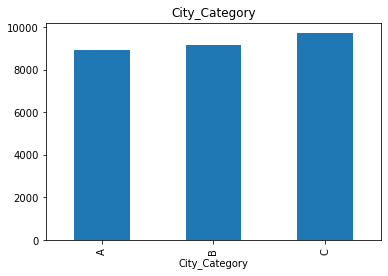

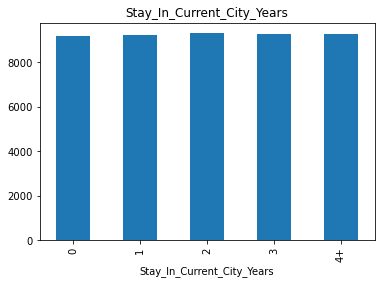

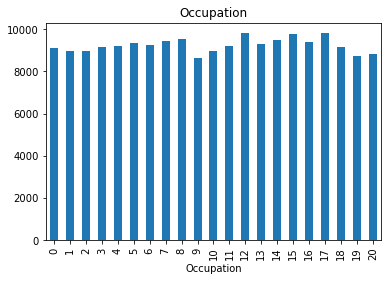

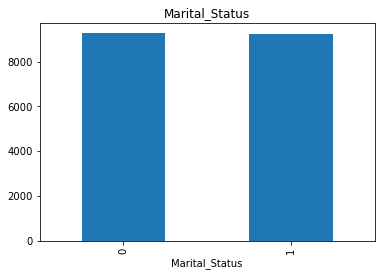

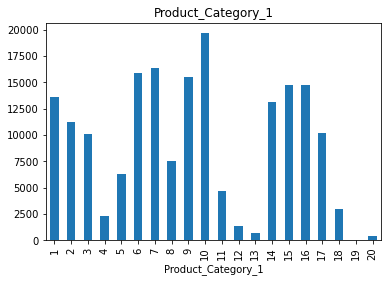

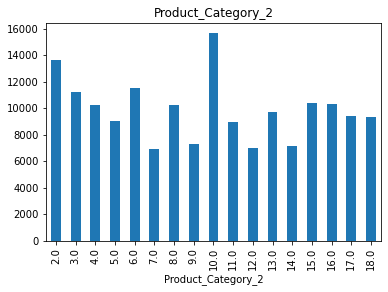

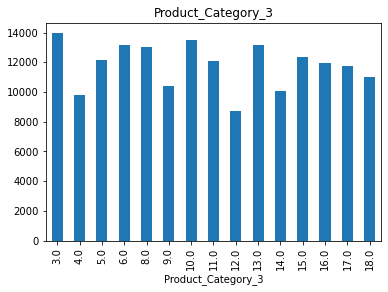

In [19]:
data = dataset.copy()
for feature in categorical_feature:
    data.groupby(feature)['Purchase'].mean().plot.bar()
    plt.title(feature)
    plt.show()
    

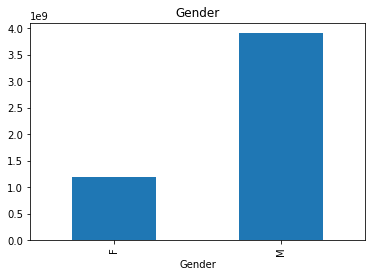

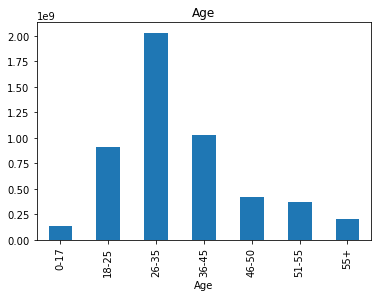

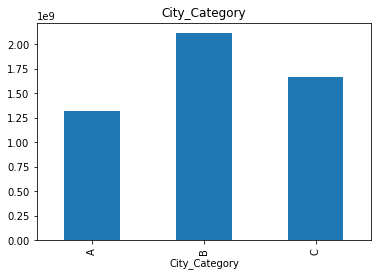

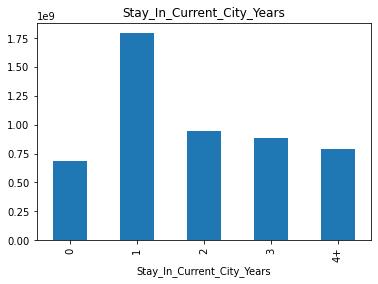

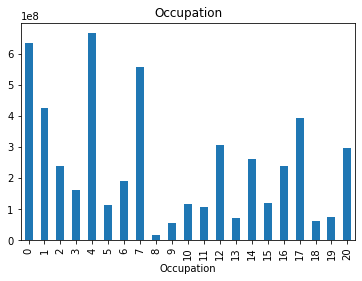

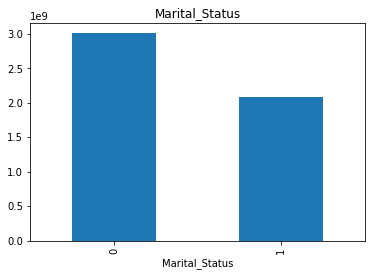

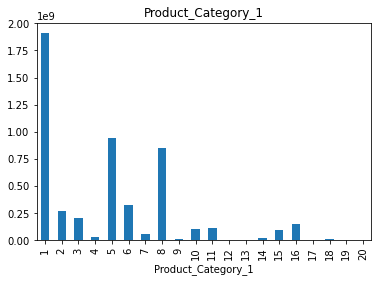

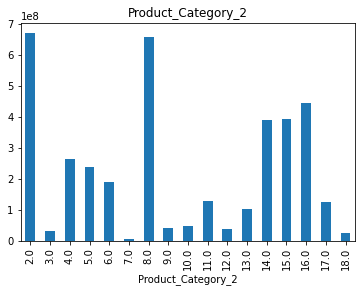

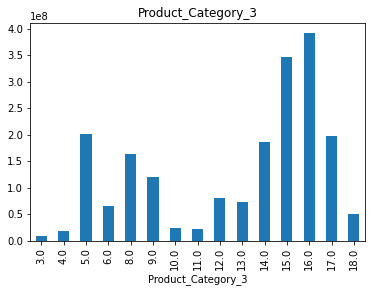

In [22]:
data = dataset.copy()
for feature in categorical_feature:
    data.groupby(feature)['Purchase'].sum().plot.bar()
    plt.title(feature)
    plt.show()

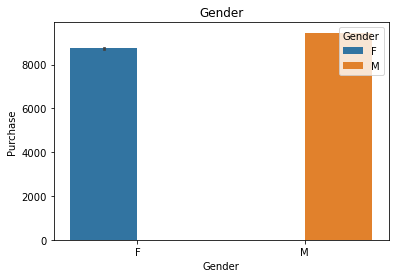

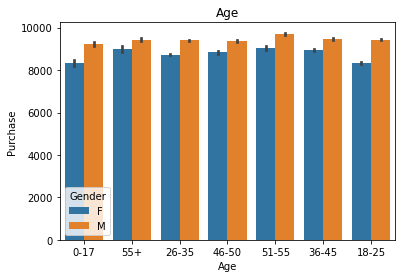

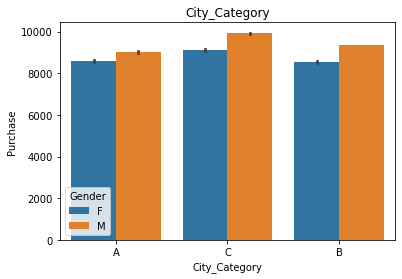

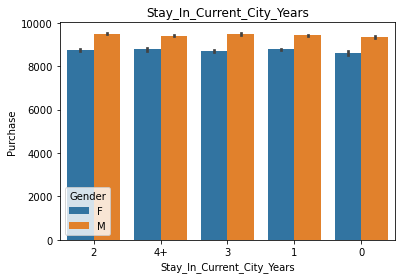

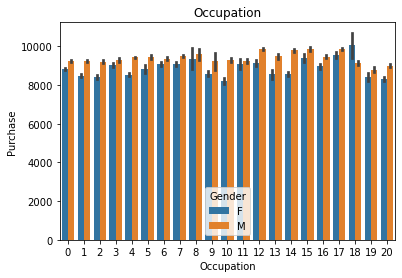

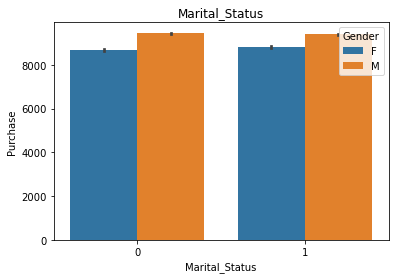

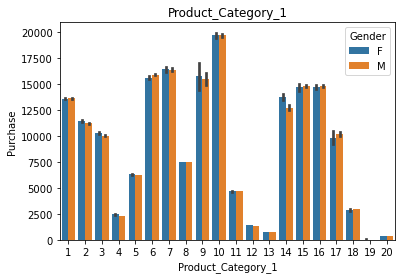

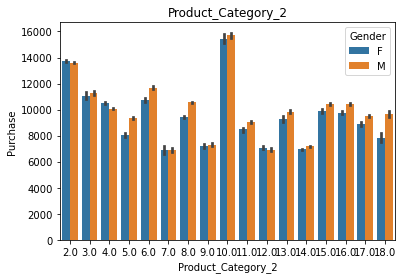

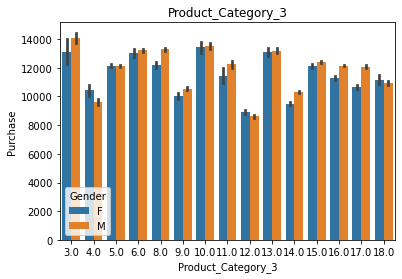

In [24]:
data = dataset.copy()
for feature in categorical_feature:
    sns.barplot(data = data, x = feature, y = 'Purchase', hue = 'Gender')
    plt.title(feature)
    plt.show()

In [78]:
feature_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

In [81]:
[dataset[feature].mean() for feature in feature_na ]

[9.842329251122386, 12.668243206790512]

In [82]:
[dataset[feature].mode() for feature in feature_na ]

[0    8.0
 dtype: float64,
 0    16.0
 dtype: float64]

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


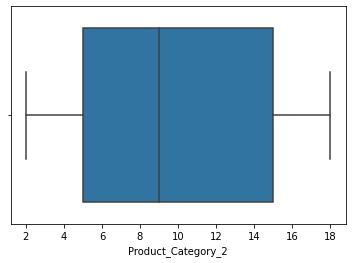

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


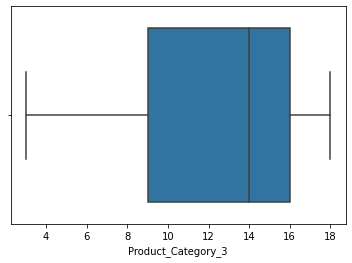

In [85]:
for feature in feature_na:
    sns.boxplot(dataset[feature])
    plt.show()

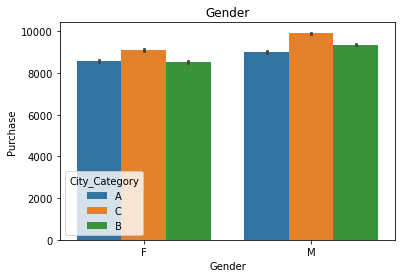

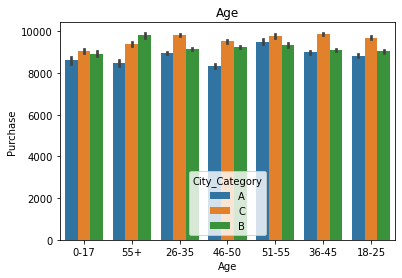

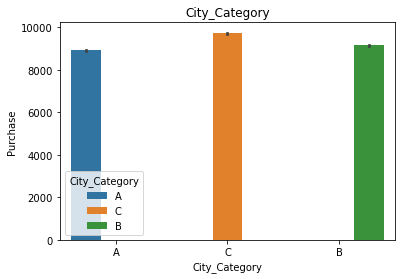

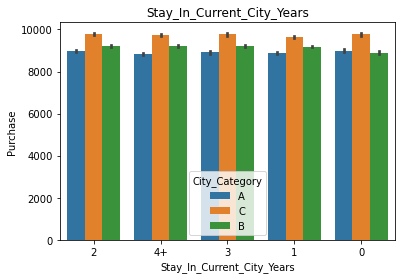

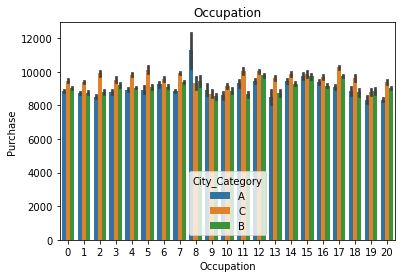

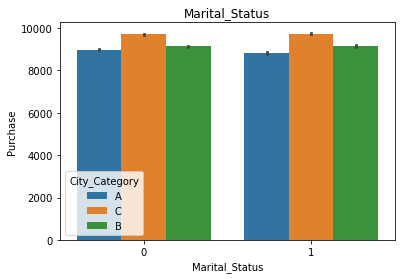

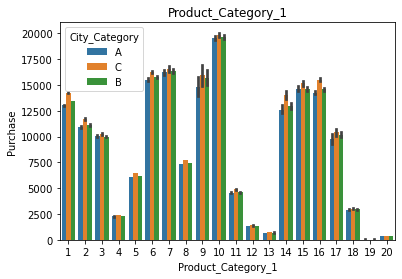

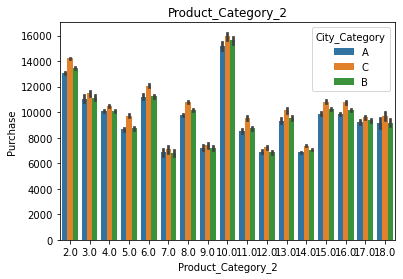

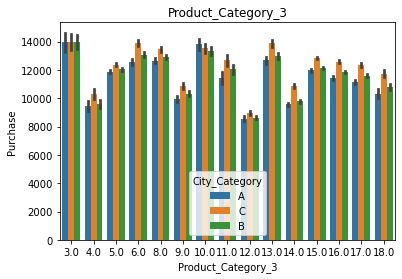

In [25]:
data = dataset.copy()
for feature in categorical_feature:
    sns.barplot(data = data, x = feature, y = 'Purchase', hue = 'City_Category')
    plt.title(feature)
    plt.show()

###  filling the nan values

In [26]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [27]:
[(dataset[feature].isnull().sum(), feature )for feature in dataset.columns ]

[(0, 'User_ID'),
 (0, 'Product_ID'),
 (0, 'Gender'),
 (0, 'Age'),
 (0, 'Occupation'),
 (0, 'City_Category'),
 (0, 'Stay_In_Current_City_Years'),
 (0, 'Marital_Status'),
 (0, 'Product_Category_1'),
 (173638, 'Product_Category_2'),
 (383247, 'Product_Category_3'),
 (0, 'Purchase')]

In [28]:
dataset.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [66]:
dataset.Product_Category_2.mode()[0]

8.0

In [67]:
dataset.Product_Category_2.fillna(dataset.Product_Category_2.mode()[0], inplace = True)

In [68]:
[(dataset[feature].isnull().sum(), feature )for feature in dataset.columns ]

[(0, 'User_ID'),
 (0, 'Product_ID'),
 (0, 'Gender'),
 (0, 'Age'),
 (0, 'Occupation'),
 (0, 'City_Category'),
 (0, 'Stay_In_Current_City_Years'),
 (0, 'Marital_Status'),
 (0, 'Product_Category_1'),
 (0, 'Product_Category_2'),
 (383247, 'Product_Category_3'),
 (0, 'Purchase')]

In [69]:
dataset.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [70]:
dataset.Product_Category_3.mode()[0]

16.0

In [71]:
dataset.Product_Category_3.fillna(dataset.Product_Category_3.mode()[0], inplace = True)

In [72]:
[(dataset[feature].isnull().sum(), feature )for feature in dataset.columns ]

[(0, 'User_ID'),
 (0, 'Product_ID'),
 (0, 'Gender'),
 (0, 'Age'),
 (0, 'Occupation'),
 (0, 'City_Category'),
 (0, 'Stay_In_Current_City_Years'),
 (0, 'Marital_Status'),
 (0, 'Product_Category_1'),
 (0, 'Product_Category_2'),
 (0, 'Product_Category_3'),
 (0, 'Purchase')]

### rename  some column names

In [73]:
dataset.rename(columns = {'Product_Category_1': 'cat1', 'Product_Category_2': 'cat2', 'Product_Category_3': 'cat3' }, inplace = True)

In [74]:
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


### renaming categories

In [75]:
dataset['Gender'] = dataset['Gender'].map({'F':0, 'M':1})

In [76]:
dataset['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [77]:
dataset['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [78]:
dataset['Age'] = dataset['Age'].map({'0-17':1,'18-25':2,'26-35' : 3,'36-45': 4, '46-50':5, '51-55': 6, '55+':7  })

In [79]:
dataset['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [80]:
city_dum = pd.get_dummies(dataset['City_Category'], drop_first = True)

In [81]:
city_dum

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [86]:
dataset = pd.concat([dataset, city_dum], axis = 1)

In [87]:
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,8.0,16.0,368,1,0
550064,1006035,P00375436,0,3,1,C,3,0,20,8.0,16.0,371,0,1
550065,1006036,P00375436,0,3,15,B,4+,1,20,8.0,16.0,137,1,0
550066,1006038,P00375436,0,7,1,C,2,0,20,8.0,16.0,365,0,1


In [89]:
dataset.drop('City_Category', axis = 1, inplace = True)

In [90]:
dataset

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,4+,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,1006035,P00375436,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,1006036,P00375436,0,3,15,4+,1,20,8.0,16.0,137,1,0
550066,1006038,P00375436,0,7,1,2,0,20,8.0,16.0,365,0,1


In [91]:
dataset['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [93]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].str.replace('+', '')

C:\Users\431170~1\AppData\Local\Temp/ipykernel_9964/1312577738.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].str.replace('+', '')


In [94]:
dataset['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [119]:
len(dataset['Product_ID'].str.replace('P', ''))

550068

In [120]:
dataset['Product_ID'] = dataset['Product_ID'].str.replace('P', '')

In [121]:
data = dataset.copy()
X = data.drop('Purchase', axis =1 )
y = data['Purchase']

In [102]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25 ,shuffle =True,random_state=10 )

In [123]:
X_train

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,B,C
427144,1005763,00026642,0,3,1,1,1,8,8.0,16.0,0,0
525945,1003054,00108842,1,2,4,1,1,5,15.0,16.0,1,0
322720,1001686,00328342,1,4,12,1,0,5,8.0,16.0,1,0
175146,1003108,00289342,1,6,6,1,1,5,8.0,14.0,1,0
249852,1002506,00136742,0,3,14,4,0,1,14.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299741,1004118,00190942,1,3,3,3,0,3,4.0,16.0,0,1
533660,1004140,00135342,1,3,0,4,0,5,8.0,16.0,1,0
105595,1004271,00113442,1,4,7,2,0,3,5.0,16.0,1,0
443712,1002230,00302942,0,5,1,4,1,8,8.0,16.0,1,0


In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
sc = StandardScaler()

In [126]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [140]:
column = data.columns